In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth',None)
path=r"C:/Users/LCP/Desktop/统计学习实现/练习/data/蒸汽/"

In [8]:
#加载数据
def load_data():
    Train=pd.read_csv(path+'zhengqi_train.txt',sep='\t')
    Test=pd.read_csv(path+'zhengqitest.txt',sep='\t')
    return Train,Test

train,test=load_data()
fea_list=test.columns.tolist()

In [9]:
#检查缺失值
train.isnull().sum()

V0        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
target    0
dtype: int64

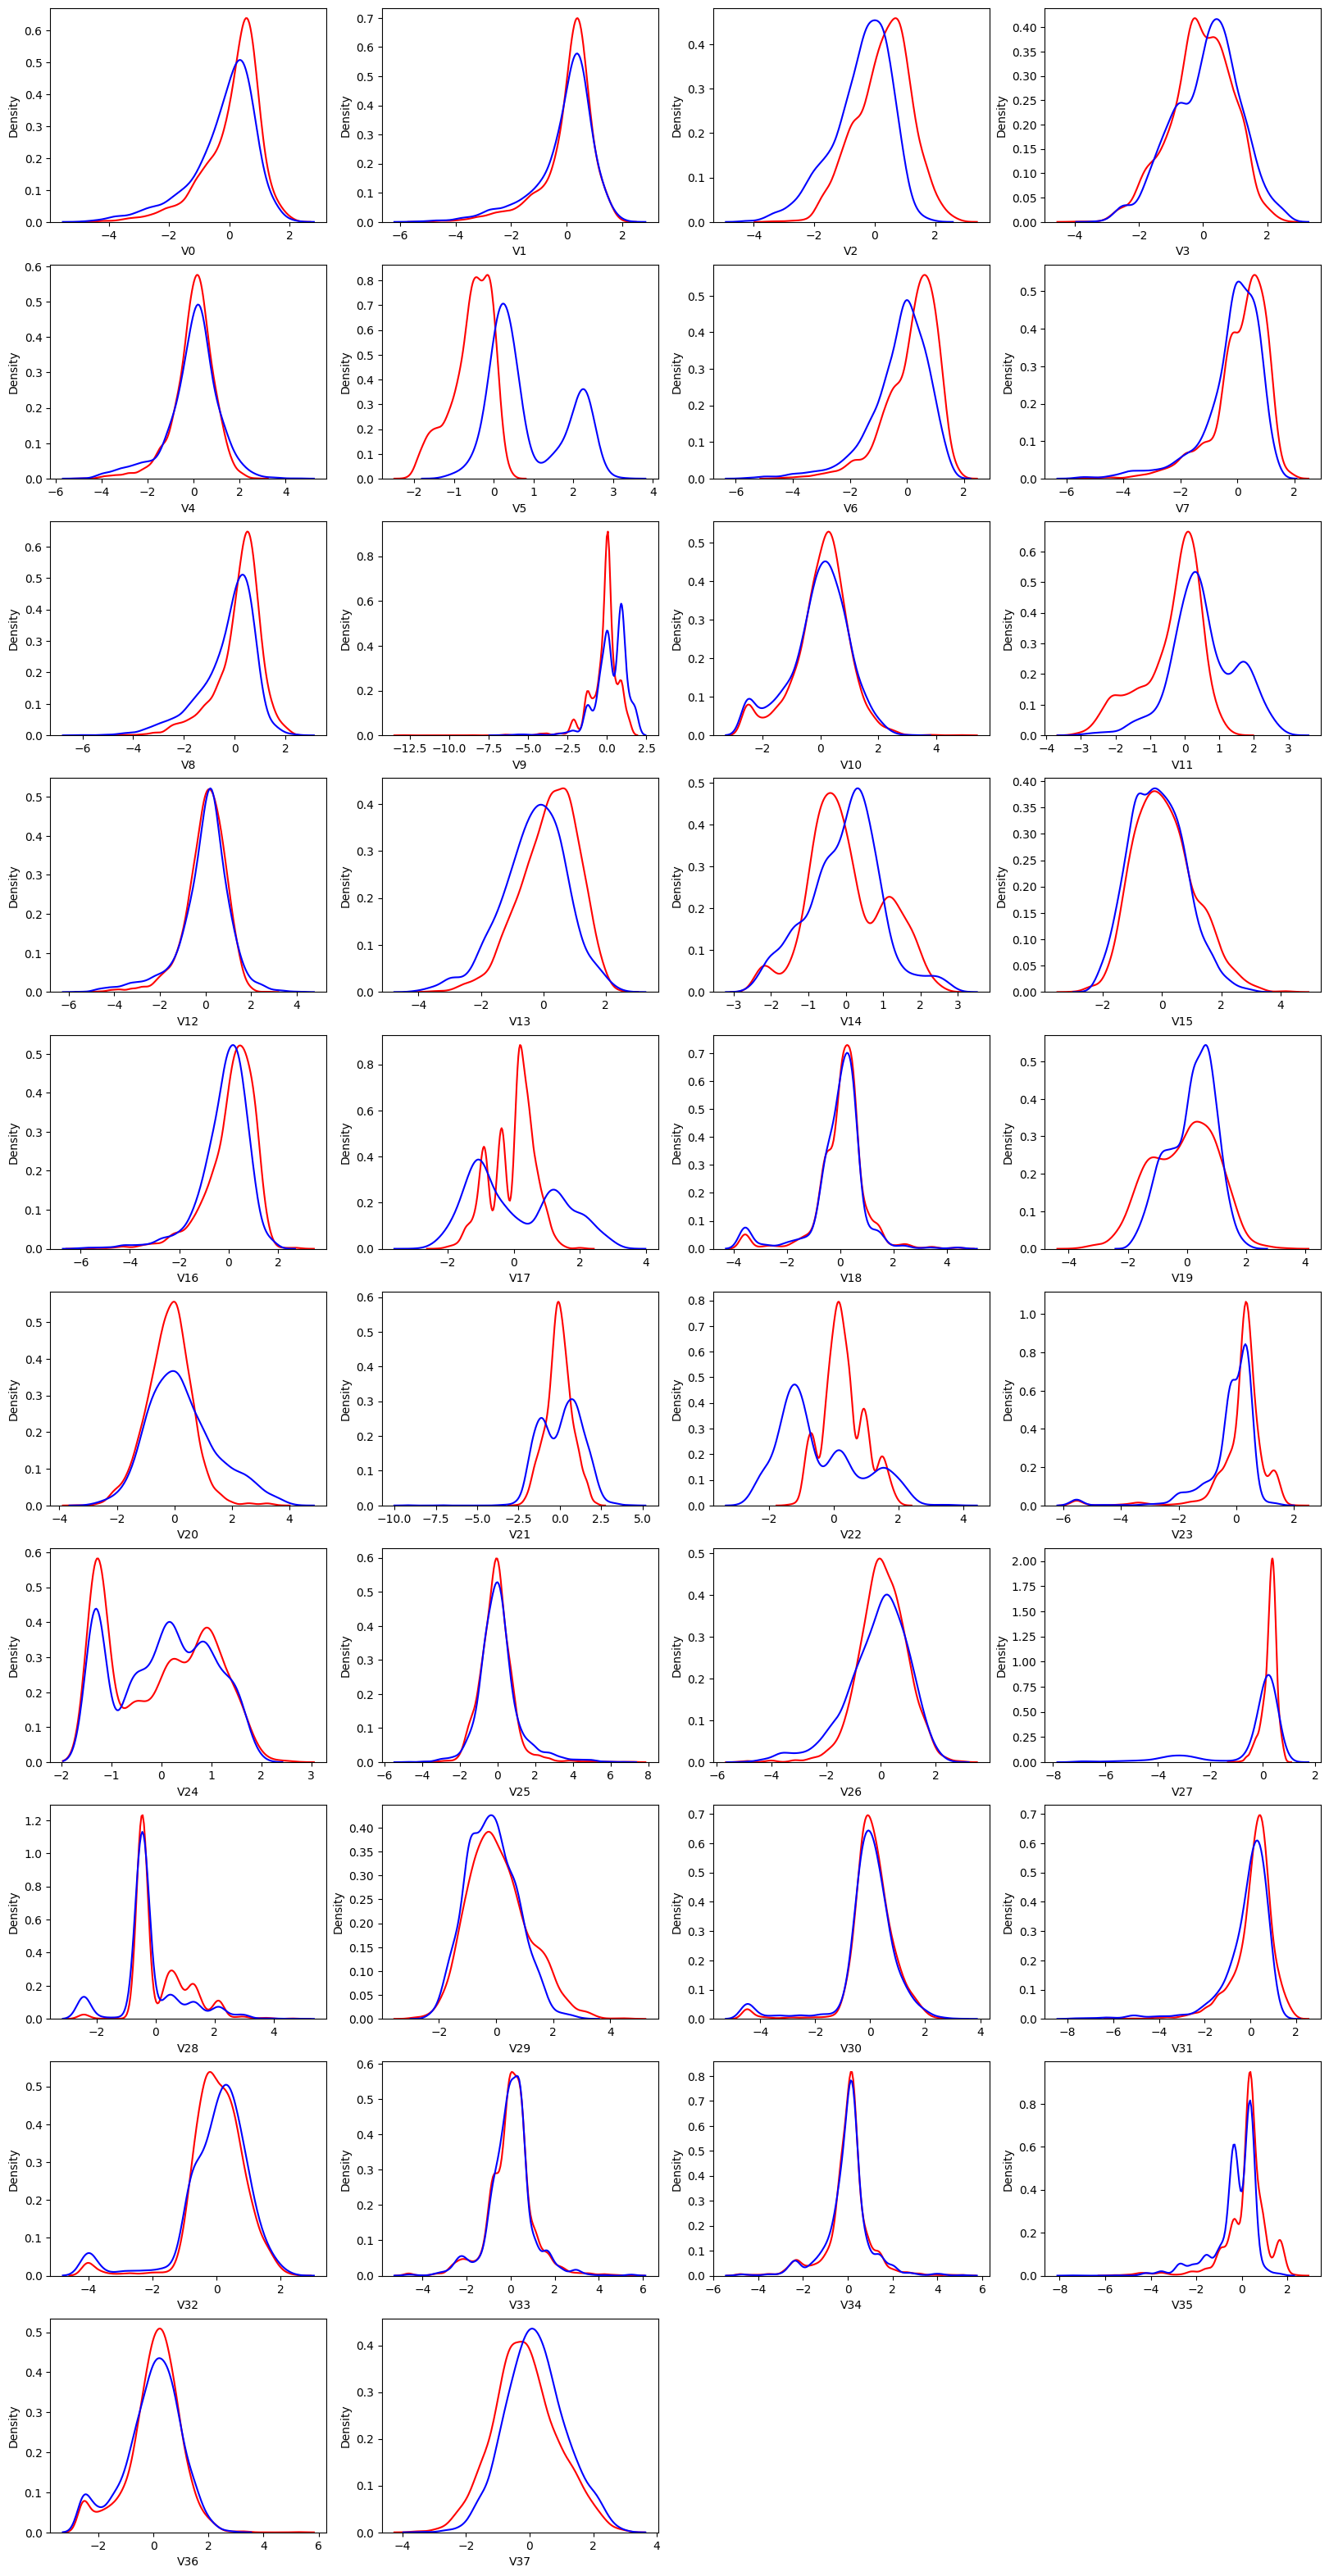

In [12]:
#查看数据的分布情况
fig=plt.figure(figsize=(20,40))
i=1
for item in fea_list:
    ax1=fig.add_subplot(10,4,i)
    sns.kdeplot(train[item],color='r',ax=ax1)
    sns.kdeplot(test[item],color='b',ax=ax1)
    i+=1
plt.show()

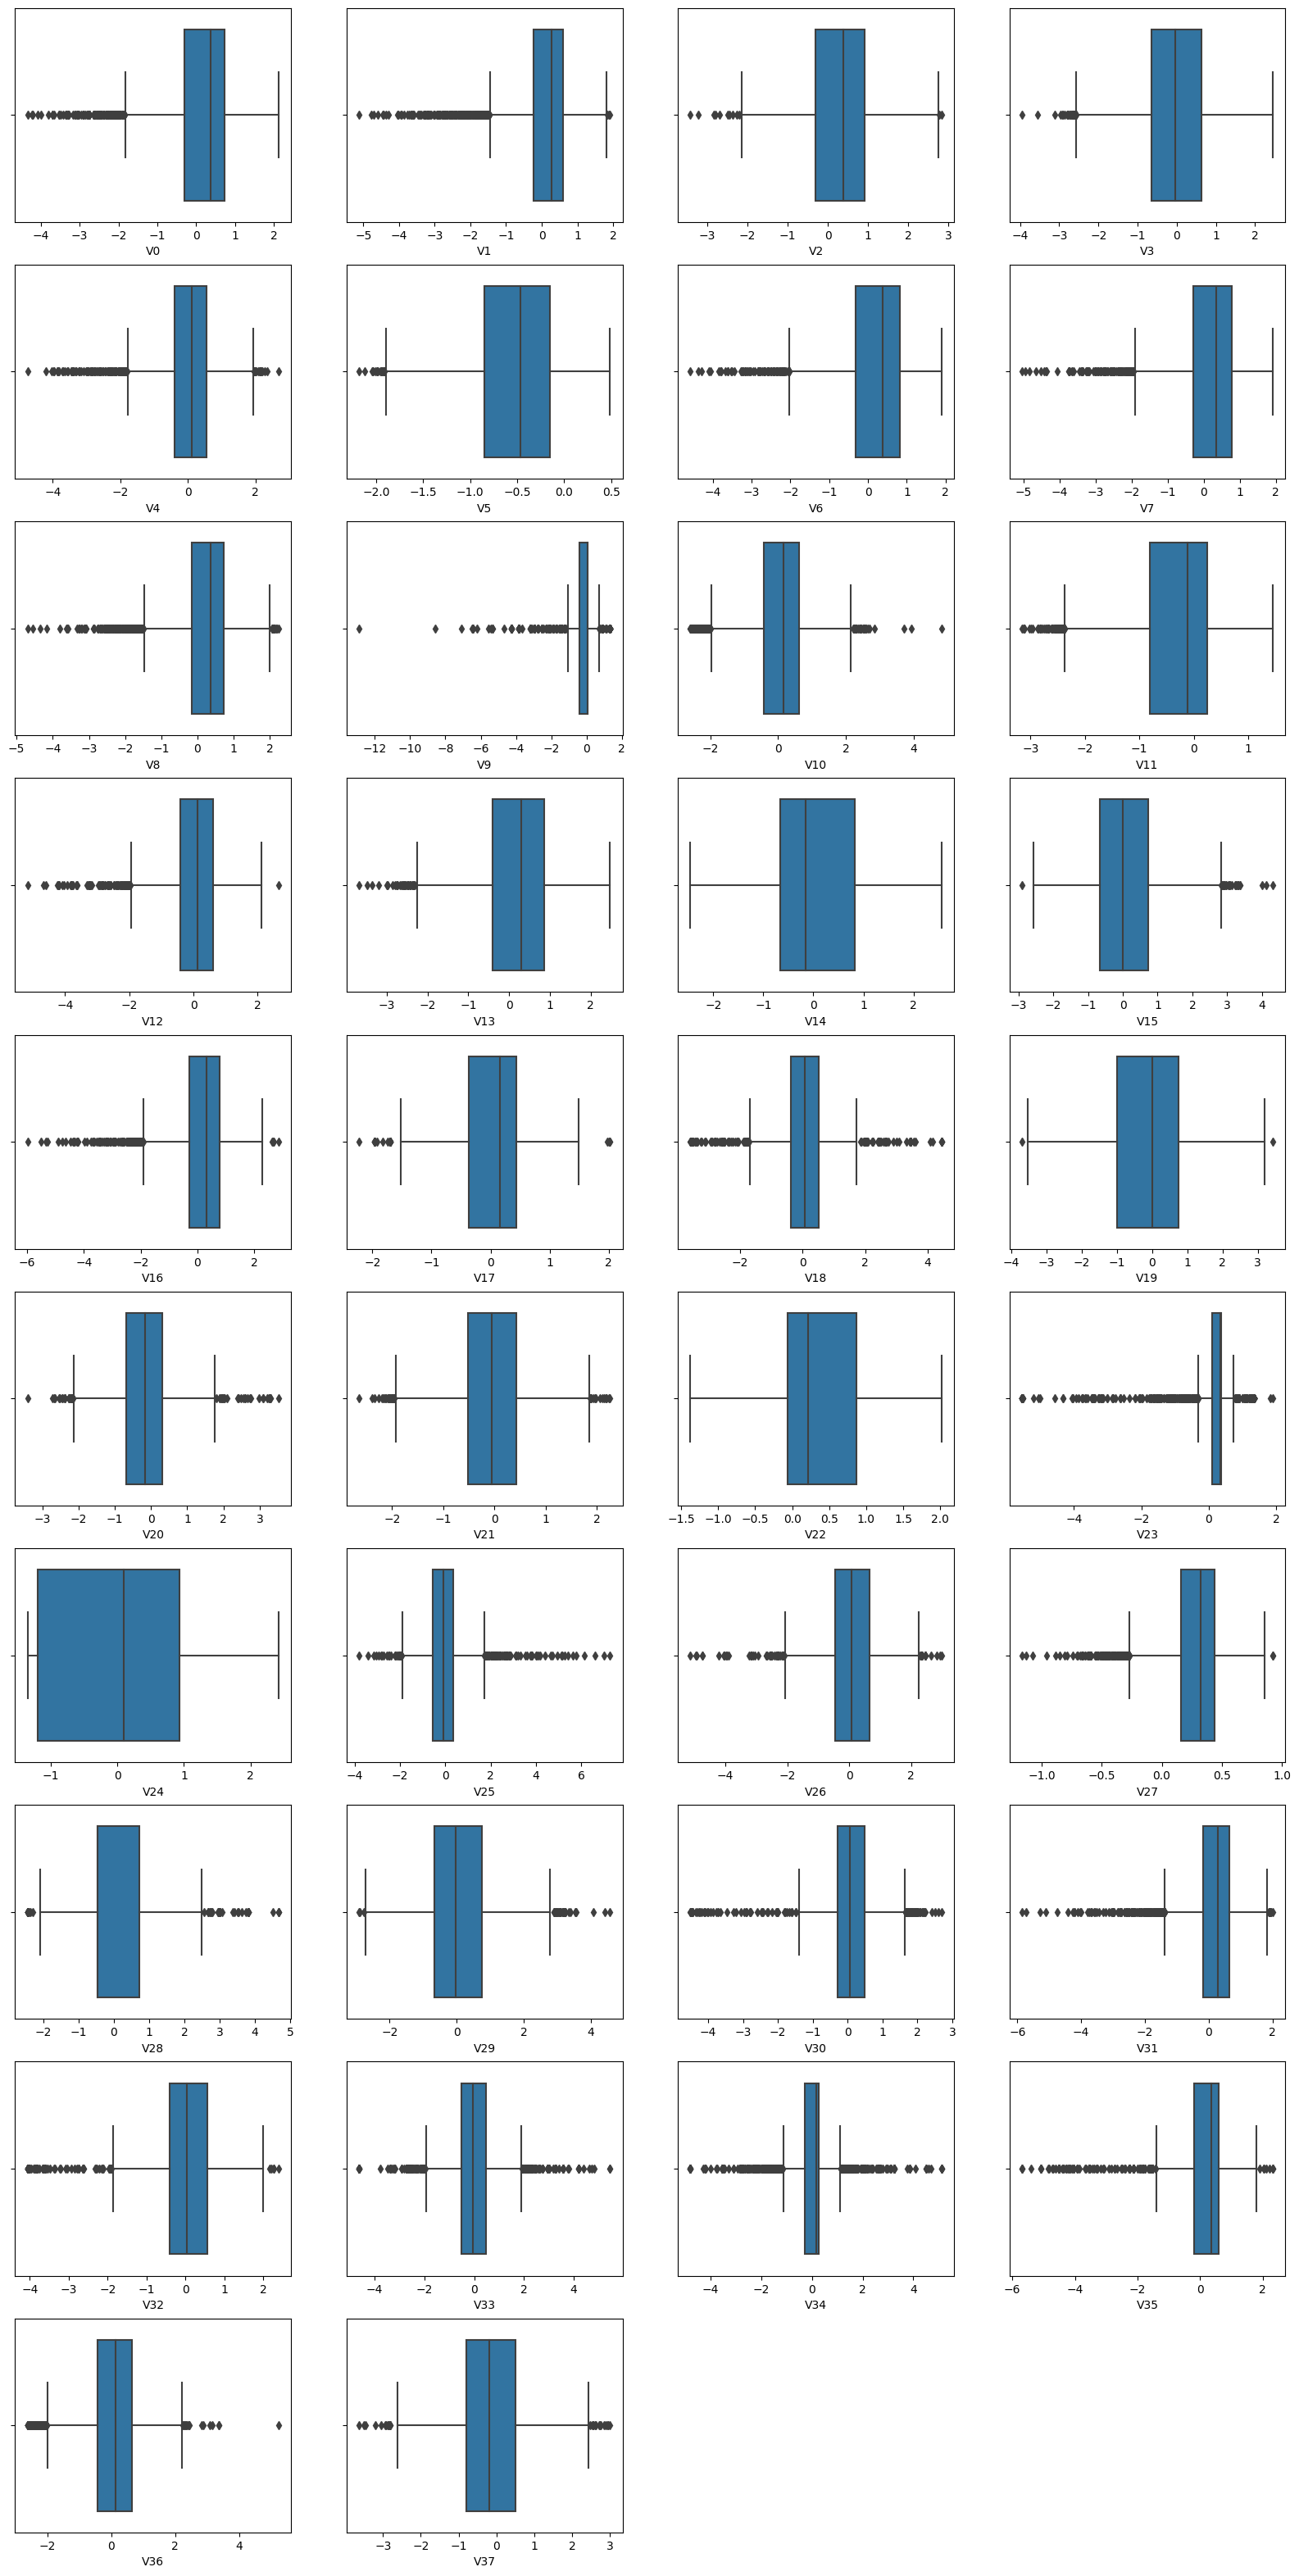

In [19]:
#绘制箱线图，查找异常值
fig=plt.figure(figsize=(20,40))
i=1
for item in fea_list:
    ax1=fig.add_subplot(10,4,i)
    sns.boxplot(x=item,data=train,ax=ax1)
    i+=1
plt.show()

# 特征工程

In [28]:
#删掉分布不一致的特征
drop_list=['V5','V17','V21']
train.drop(columns=drop_list,inplace=True)
test.drop(columns=drop_list,inplace=True)

# 模型训练

In [29]:
#构建数据
Y=np.array(train['target'])
X=np.array(train.drop(columns=['target']))
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2)

In [30]:
#主成分回归
from sklearn.decomposition import PCA
PCA_mod=PCA(n_components=0.99)
dex=PCA_mod.fit_transform(train_x)
dex_test=PCA_mod.transform(test_x)

from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(dex,train_y)
model=sgd

In [31]:
#查看RMSE
from sklearn.metrics import mean_squared_error
y_pred_train=model.predict(dex)
y_pred_test=model.predict(dex_test)
print('训练集均方误差:',mean_squared_error(y_pred=y_pred_train,y_true=train_y))
print('测试集均方误差:',mean_squared_error(y_pred=y_pred_test,y_true=test_y))

训练集均方误差: 0.12482264417683701
测试集均方误差: 0.11357027009429951


# 在测试集上应用模型

In [32]:
#选择效果最好的模型对题目数据进行预测
Test=np.array(test)
lowd_x=PCA_mod.transform(Test)
y_pred_test=model.predict(lowd_x)
np.savetxt(path+'result.txt',y_pred_test,fmt='%f')